<a href="https://colab.research.google.com/github/faryal-art/week4_pytorch/blob/main/ch02_Pytorch_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2: Neural Network Classification

* Classification
   * A classification problem is when a model learns to sort data into categories or labels, like deciding if an email is spam or not spam
* Binary classification
  * Target can be one of two options, e.g. yes or no
* Multi-class classification
  * Target can be one of more than two options
* Multi-label classification
  * Target can be assigned more than one option

  


In [1]:
 import torch
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import sklearn
 from sklearn.datasets import make_circles

### 1 Data

In [2]:
# make 1000 samples
n_samples=1000


# circles
x,y= make_circles(n_samples, noise=0.02,random_state=42)
len(x),len(y)

(1000, 1000)

In [3]:
# looking first 10 samples
x[:10],y[:10]

(array([[ 0.76026594,  0.22387823],
        [-0.76722217,  0.1455425 ],
        [-0.80815854,  0.14894355],
        [-0.3760283 ,  0.70320906],
        [ 0.44051035, -0.89761737],
        [-0.48452681,  0.66063343],
        [-0.01244985,  0.80221142],
        [ 0.77745843,  0.1418763 ],
        [-0.16613755, -0.79026518],
        [-0.12692063,  1.01115984]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [4]:
# create a dataframe
circle_df=pd.DataFrame({"x1": x[:,0],  "x2":x[:,1], "label" : y[:]})


circle_df.head(15)

,x1,x2,label
0,0.760266,0.223878,1
1,-0.767222,0.145542,1
2,-0.808159,0.148944,1
3,-0.376028,0.703209,1
4,0.440510,-0.897617,0
5,-0.484527,0.660633,1
6,-0.012450,0.802211,1
7,0.777458,0.141876,1
8,-0.166138,-0.790265,1
9,-0.126921,1.011160,0


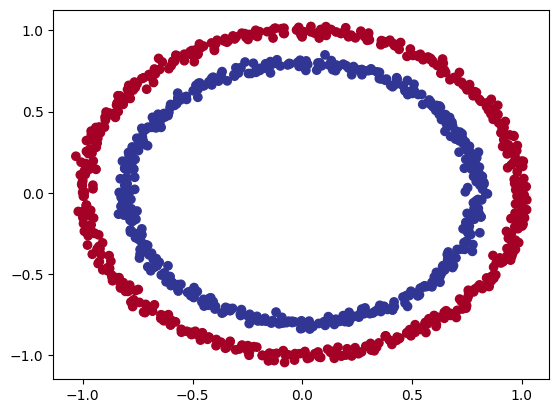

In [5]:
# visualiaze  the dataframe
plt.scatter(x=x[:,0] , y=x[:,1], c=y , cmap=plt.cm.RdYlBu);






Note: The data we are working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to pratice fundamentals

#### checking the shape of input and output

In [6]:
print(f"shape of x: {x.shape}")
print(f"shape of y: {y.shape}")

shape of x: (1000, 2)
shape of y: (1000,)


In [7]:
x

array([[ 0.76026594,  0.22387823],
       [-0.76722217,  0.1455425 ],
       [-0.80815854,  0.14894355],
       ...,
       [-0.14123526, -0.80195115],
       [ 0.67509008, -0.75465723],
       [ 0.28237752,  0.96205688]])

In [8]:
# view the firdt example of features and labels
x_sample=x[0]
y_sample=y[0]

print(f"value of first sample of x: {x_sample} and same for y: {y_sample}")
print(f"shape of first sample of x: {x_sample.shape} and same for y: {y_sample.shape}")

value of first sample of x: [0.76026594 0.22387823] and same for y: 1
shape of first sample of x: (2,) and same for y: ()


### Turn data into tensor
### Create train and test split


In [9]:
torch.__version__

'2.6.0+cu124'

In [10]:
type(x)

numpy.ndarray

In [11]:
# turn array into tensors
x=torch.from_numpy(x).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [12]:
type(x),x.dtype,y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [13]:
# split data into train and test sets
from sklearn.model_selection import train_test_split


# test size 0.2 means 20% data wil be for test and 80% is for train
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2 , random_state=42)
len(x_train),len(x_test),len(y_train),len(y_test)


(800, 200, 800, 200)

### 2. Building the model
build the mosel to classify our red and blue dots   

 to do tso we want to
1. setup device agnostic code
 2. construct the model
 3. defining loss function and optimizer
 4. training and testing loop


###  2.1 setup device agnostic code

In [14]:
from torch import nn

# 1 setup device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [15]:
x_train

tensor([[ 0.6483, -0.4748],
        [ 0.6464, -0.7356],
        [-1.0020, -0.1328],
        ...,
        [ 0.0231, -1.0198],
        [ 1.0036,  0.1621],
        [ 0.5568, -0.5727]])

#### 2.2 model building
we have to create a model that can

1. we need to create a subclass that is inhereted to base class nn.Module
2. a linear layer to handle the shape of our data
3. forward () method
 4. instantiate an instance of our model class and send it to target device

In [16]:
#1  create a model that subclass nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2 linear layers to handle shape of data
    self.layer1=nn.Linear(in_features=2, out_features=5)
    self.layer2=nn.Linear(in_features=5, out_features=1)


  # 3  define forward() method
  def forward(self, x):
    return self.layer2(self.layer1(x)) #x -> layer1 ->layer 2

#instantiate an instance of our model class and send it to target device
model_0=CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
device

'cpu'

In [18]:
 next(model_0.parameters()).device

device(type='cpu')

In [19]:
# we can create our model same as baove using nn.sequential()
model_0=nn.Sequential(
    nn.Linear(in_features=2 , out_features=5),
    nn.Linear(in_features=5 ,  out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2786, -0.0017],
                      [-0.4392, -0.1330],
                      [ 0.5997, -0.1680],
                      [ 0.0843,  0.5594],
                      [ 0.3652,  0.1490]])),
             ('0.bias', tensor([ 0.2038, -0.5122,  0.6019,  0.2526,  0.3196])),
             ('1.weight',
              tensor([[ 0.3786,  0.1655, -0.2103, -0.2656, -0.3983]])),
             ('1.bias', tensor([-0.3355]))])

In [21]:
#make prediction
with torch.inference_mode():
  untrained_preds=model_0(x_test.to(device))

print(f"lenght of predictions : {len(untrained_preds)} , shape : {untrained_preds.shape}")
print(f" lenght of test samples : {len(x_test)},  shape : {x_test.shape}")
print(f"first 10 predictions : {untrained_preds[:10]}")
print(f"first 10 sample : {y_test[:10]}")




lenght of predictions : 200 , shape : torch.Size([200, 1])
 lenght of test samples : 200,  shape : torch.Size([200, 2])
first 10 predictions : tensor([[-0.6986],
        [-0.8524],
        [-0.4157],
        [-0.7726],
        [-0.6307],
        [-0.7204],
        [-0.9934],
        [-0.9613],
        [-0.4140],
        [-0.8706]])
first 10 sample : tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [22]:
x_test[:10],y_test[:10]

(tensor([[-0.3815,  0.6872],
         [-0.0065,  0.9729],
         [-0.7112, -0.3203],
         [-0.3011,  0.9586],
         [ 0.4112, -0.7210],
         [ 0.6270, -0.5507],
         [ 0.8452,  0.5557],
         [ 0.9963,  0.1893],
         [-0.7558, -0.2695],
         [ 0.0568,  0.9819]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### Defining loss function and optimizer
* loss function selection is  totally based on our problem type
* for regression  we commonaly use MAE (mean absolute error ) or MSE (mean squared error)
* for classification problem we can use binary cross entropy or categorical class entropy


 Two most common optimizers are SGD and ADAM , however pytorch has many built_in options  



 We are using `torch.nn.BCEWithLogistLoss()`

In [23]:
# at this point our model's performance is very bad  so we move to setup our loss function and optimizer to make performance better
loss_fn=nn.BCEWithLogitsLoss() # -> it has sigmoid activattion function built in


#optimizer setup
opt = torch.optim.SGD(params=model_0.parameters(), lr=0.1)




In [24]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2786, -0.0017],
                      [-0.4392, -0.1330],
                      [ 0.5997, -0.1680],
                      [ 0.0843,  0.5594],
                      [ 0.3652,  0.1490]])),
             ('0.bias', tensor([ 0.2038, -0.5122,  0.6019,  0.2526,  0.3196])),
             ('1.weight',
              tensor([[ 0.3786,  0.1655, -0.2103, -0.2656, -0.3983]])),
             ('1.bias', tensor([-0.3355]))])

In [25]:
# calculate accuracy
def accuracy_fn (y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

### Model training
to train model we need to build a training loop . steps included in training loop are as follow
* training loop  
1. train a model
2. forwad pass
3. optimizer zzero grad
4. loss backward
5. optimizer step (gradient descent )


what is logits ?
1. Logits are the raw, unnormalized scores output by a model before applying activation functions like sigmoid or softmax.
2.  Logits can be any real number (positive or negative), unlike probabilities which range between 0 and 1.
3. In PyTorch, functions like BCEWithLogitsLoss or CrossEntropyLoss expect logits as input, not probabilities.
4. logits are passed through activation functions (like softmax, sigmoid ) to convert them into probabilities  


output of the model -> logits
logits -> pass through activation function -> probabilities

In [26]:
# first 5 outputs of farward passs
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(x_test.to(device))[:5]
y_logits

tensor([[-0.6986],
        [-0.8524],
        [-0.4157],
        [-0.7726],
        [-0.6307]])

In [27]:
 y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [28]:
# use sigmoid function on model's logits to cinvert them itno probabilities
y_pred_prob=torch.sigmoid(y_logits)
y_pred_prob





tensor([[0.3321],
        [0.2989],
        [0.3975],
        [0.3159],
        [0.3473]])

For prediction probability values , we need to perform range-style rounding on them
probability >= 0.5 ->means it belong to class 1


probability <0.5 -> means it belong to class 0

In [29]:
# ouput labels based on model's prediction
torch.round(y_pred_prob)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

### Training and Testing loop

In [30]:

torch.manual_seed(42)
torch.cuda.manual_seed(42)


# no o epoch
epoch=100

# putting data on target device
x_train,y_train=x_train.to(device),y_train.to(device)
x_test,y_test=x_test.to(device),y_test.to(device)

# training loop
for epoch in range(epoch):

  # training
  model_0.train()

  #forward pass
  y_logits=model_0(x_train).squeeze()
  y_preds=torch.round(torch.sigmoid(y_logits) # sigmoid to turn logits into probabilities , round to round off them
  )

  # calculate loss and accuracy
  loss=loss_fn(y_logits,y_train) #BCEEithLogitsLoss expects raw logits as input as it ha sigmoid function in it

  acc=accuracy_fn(y_train,y_preds)

  #optimizer
  opt.zero_grad()

  # backpropagation
  loss.backward()

  #optimizer step(update the parameters to reduce the gradient / gradient descent )
  opt.step()

  ###Testing
  model_0.eval()
  with torch.inference_mode():

    # forward pass
    test_logits=model_0(x_test).squeeze()
    test_preds=torch.round(torch.sigmoid(test_logits))

    #calculate loss
    test_loss=loss_fn(test_logits, y_test)

    test_acc=accuracy_fn(y_test,test_preds)

    #print what is happening
    if epoch % 10==0 :
      print(f"epoch: {epoch} | loss: {loss:5f} | acc: {acc:2f} | test loss : {test_loss:5f} | test accuracy : { test_acc:2f} ")










epoch: 0 | loss: 0.753173 | acc: 50.000000 | test loss : 0.741539 | test accuracy : 50.000000 
epoch: 10 | loss: 0.713355 | acc: 50.000000 | test loss : 0.706832 | test accuracy : 50.000000 
epoch: 20 | loss: 0.700560 | acc: 50.000000 | test loss : 0.696101 | test accuracy : 50.000000 
epoch: 30 | loss: 0.696314 | acc: 43.875000 | test loss : 0.692875 | test accuracy : 45.000000 
epoch: 40 | loss: 0.694830 | acc: 46.625000 | test loss : 0.692005 | test accuracy : 48.500000 
epoch: 50 | loss: 0.694251 | acc: 47.500000 | test loss : 0.691860 | test accuracy : 51.000000 
epoch: 60 | loss: 0.693977 | acc: 48.000000 | test loss : 0.691928 | test accuracy : 52.000000 
epoch: 70 | loss: 0.693813 | acc: 48.500000 | test loss : 0.692052 | test accuracy : 52.500000 
epoch: 80 | loss: 0.693695 | acc: 49.375000 | test loss : 0.692185 | test accuracy : 52.500000 
epoch: 90 | loss: 0.693600 | acc: 49.125000 | test loss : 0.692314 | test accuracy : 53.000000 


### Make predictions and evaluate the model

 from metrics above it looks like model is not learning anything ...

 so lets see why it is nor learning them  by making some predictions and visualize them .


 To do so , we need to import a `plot_decision_boundary()` method

In [31]:
import requests
from pathlib import Path

#download helper functions from learn pytorch repo (if it is not already downoaded )
if Path("helper_functions.py").is_file():
  print("helper_function.py already exists, skip downloading ")

else:
  print("downloadinf_helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py" ,"wb") as f:
    f.write(request.content)


downloadinf_helper_functions.py


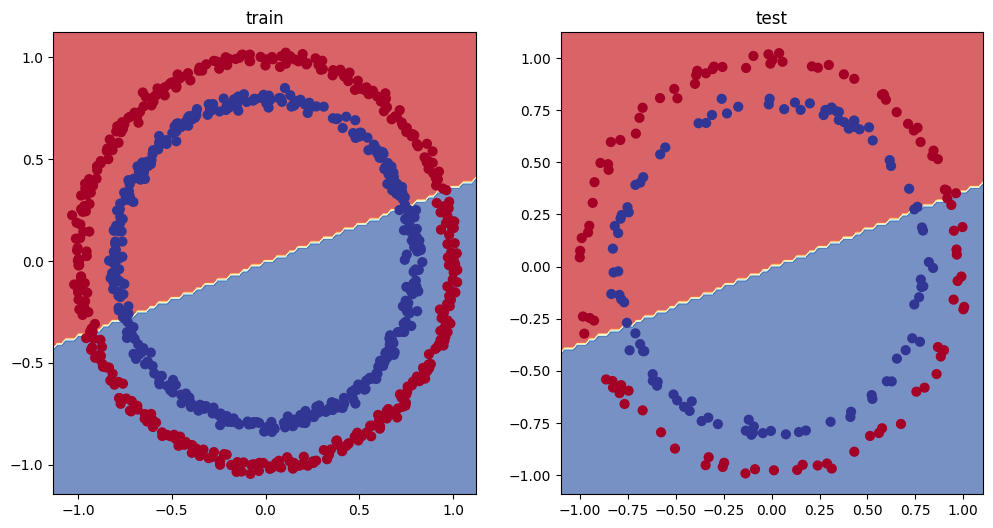

In [32]:
#plot decision boundary of model

from helper_functions import plot_predictions , plot_decision_boundary
plt.figure(figsize=(12,6))
#plot for training
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0,x_train,y_train) #training plot


#plot for testing
plt.subplot(1,2,2) # plot for testing data
plt.title("test")
plot_decision_boundary(model_0,x_test,y_test)



### Improving model
* Adding more layers - more chances to learn about patterns  in data
* Add more hidden units (add more neurons in layers )
* Fit for longer
* Changing activation functions
* change the optimization function
* Change the learning rate


These options are all from a model's prespective because they deal directly with the model rather than the data

 And because all these options are values we can change , they are hyperparameters.

In [33]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=1)

# overwrite forward() method
  def forward(self,x):
    '''
    z=self.layer1(x)
    z=self.layer2(z)
    z=self.layer3(z)
    return z
    '''
    # faster way to do the same as above
    return self.layer3(self.layer2(self.layer1(x)))

model_1=CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [34]:
# create loss function
loss_fn=nn.BCEWithLogitsLoss()

# optimizer
opt=torch.optim.SGD(params=model_1.parameters(), lr=0.001)

In [35]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#no of epochs
epoch=1000

#put data on target device
x_train,y_train=x_train.to(device),y_train.to(device)
x_test,y_test=x_test.to(device),y_test.to(device)

# trainig loop
for epoch in range(epoch):
  #train the model
  model_1.train()

  #forward pass
  y_logits=model_1(x_train).squeeze()
  y_preds=torch.round(torch.sigmoid(y_logits))

  #caculate loss adnd acuuracy
  loss=loss_fn(y_logits,y_train)

  acc=accuracy_fn(y_train,y_preds)

  #optimizer
  opt.zero_grad()

  #backporpagatiion
  loss.backward()

  #optimzer step(gradient descent )
  opt.step()

  #testing loop
  model_1.eval()
  with torch.inference_mode():
    # forward pass
    test_logits=model_1(x_test).squeeze()
    test_preds=torch.round(torch.sigmoid(test_logits))

    # calculate the loss
    test_loss=loss_fn(test_logits,y_test)

    test_acc=accuracy_fn(y_test,test_preds)

  # print what happening
  if epoch % 10 ==0:
    print(f"epoch: {epoch} | loss: {loss:5f} | acc: {acc:2f} | test loss : {test_loss:5f} | test accuracy : { test_acc:2f} ")

epoch: 0 | loss: 0.693968 | acc: 50.750000 | test loss : 0.692600 | test accuracy : 51.000000 
epoch: 10 | loss: 0.693964 | acc: 50.750000 | test loss : 0.692601 | test accuracy : 51.000000 
epoch: 20 | loss: 0.693961 | acc: 50.875000 | test loss : 0.692601 | test accuracy : 51.000000 
epoch: 30 | loss: 0.693958 | acc: 50.875000 | test loss : 0.692602 | test accuracy : 51.000000 
epoch: 40 | loss: 0.693954 | acc: 50.875000 | test loss : 0.692602 | test accuracy : 51.000000 
epoch: 50 | loss: 0.693951 | acc: 50.875000 | test loss : 0.692603 | test accuracy : 51.000000 
epoch: 60 | loss: 0.693948 | acc: 50.875000 | test loss : 0.692603 | test accuracy : 51.000000 
epoch: 70 | loss: 0.693944 | acc: 50.875000 | test loss : 0.692603 | test accuracy : 51.000000 
epoch: 80 | loss: 0.693941 | acc: 50.875000 | test loss : 0.692604 | test accuracy : 51.000000 
epoch: 90 | loss: 0.693938 | acc: 50.875000 | test loss : 0.692604 | test accuracy : 51.000000 
epoch: 100 | loss: 0.693935 | acc: 50.875

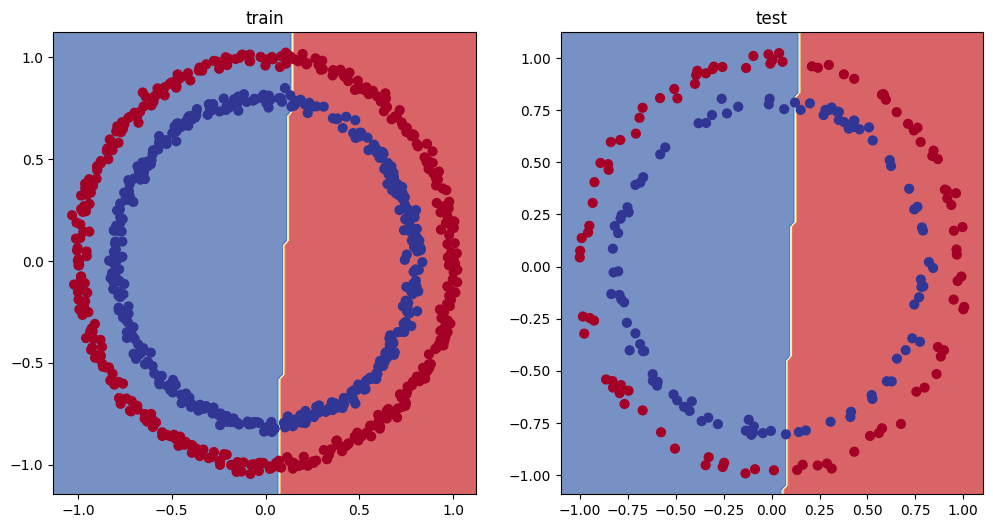

In [36]:
# plot the decision boundary for this model
plt.figure(figsize=(12,6))

# trainig plot
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_1,x_train,y_train)

#testing plot
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1,x_test,y_test)




still accuracy metric result shows thot our model is not learning instead it is ony making a guess

we are using linear model to plot on non linear data we need to chage the model


#### 5.1 prepare some data to see if our model can fit straight line

In [37]:
#create some data(same as we did in notebook 1)

# setting the ideal value for weight and bias
weight =0.7
bias =0.3

#create data
x_regression=torch.arange(start=0, end=1,step=0.01)
y_regression=bias+(weight*x_regression)

# check data
len(x_regression),len(y_regression)




(100, 100)

In [38]:
# first five samples of both x and y
print (f"first five sample of x: {x_regression[:5]}")
print(f"first five samples of y : {y_regression[:5]}")

first five sample of x: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400])
first five samples of y : tensor([0.3000, 0.3070, 0.3140, 0.3210, 0.3280])


In [39]:
# train and test split
#train_split
from sklearn.model_selection import train_test_split
train_split= int(0.8*len(x_regression))

# train data
x_train_reg,y_train_reg=x_regression[:train_split],y_regression[:train_split]
x_test_reg,y_test_reg=x_regression[train_split:],y_regression[train_split:]

# check length of train and test data
len(x_train_reg),len(x_test_reg),len(y_train_reg),len(y_test_reg)


(80, 20, 80, 20)

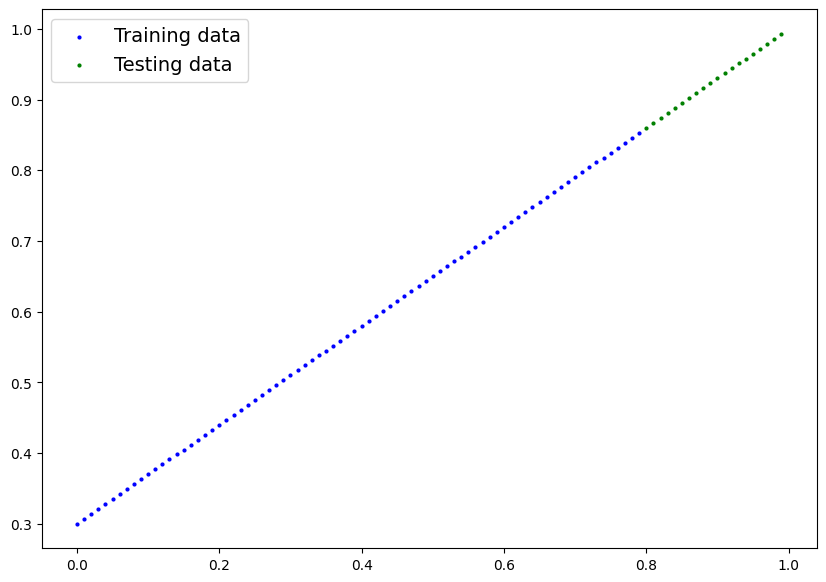

In [40]:
#plot predictions
#as we have imported plot prediction from helper function above
plot_predictions(x_train_reg,y_train_reg,x_test_reg,y_test_reg,predictions=None)

### 5.2 adjusting model_1 to fit starigh line

In [41]:
# same architecture as model_1 (but here we are using nn.sequential)
model_2=nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10 , out_features=1)

).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [42]:
# loss function and optimizer
loss_fn=nn.L1Loss()
opt=torch.optim.SGD(params=model_2.parameters(),lr=0.01)



In [43]:
#training loop
#training the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# no of epoch
epoch=1000

#set data to target device (cuda )
x_train_reg,y_train_reg =x_train_reg.to(device).unsqueeze(1),y_train_reg.to(device).unsqueeze(1)
x_test_reg,y_test_reg= x_test_reg.to(device).unsqueeze(1), y_test_reg.to(device).unsqueeze(1)
for epoch in range(epoch):
  #train model
  model_2.train()

  #forward pass
  y_pred=model_2(x_train_reg)

  #calculate the loss
  loss=loss_fn(y_pred,y_train_reg)

  # optimizer
  opt.zero_grad()

  #backpropagation(tp find gradient )
  loss.backward()

  #optimizer step (gradient descent )(calculate and update values for weights and bias)
  opt.step()

  #testing loop
  model_2.eval() # turn off differennt setting in model that are not needed
  with torch.inference_mode():
    #forward pass
    test_preds=model_2(x_test_reg)
    #loss
    test_loss=loss_fn(test_preds,y_test_reg)

    #printing what is happening
    if epoch % 10 ==0:
      print(f"epoch: {epoch} | loss: {loss:5f} | test_loss: {test_loss:5f}  ")

epoch: 0 | loss: 0.759858 | test_loss: 0.911029  
epoch: 10 | loss: 0.402404 | test_loss: 0.504739  
epoch: 20 | loss: 0.060074 | test_loss: 0.101508  
epoch: 30 | loss: 0.015595 | test_loss: 0.032307  
epoch: 40 | loss: 0.030917 | test_loss: 0.001107  
epoch: 50 | loss: 0.031961 | test_loss: 0.001076  
epoch: 60 | loss: 0.031919 | test_loss: 0.001702  
epoch: 70 | loss: 0.030806 | test_loss: 0.000966  
epoch: 80 | loss: 0.030772 | test_loss: 0.001498  
epoch: 90 | loss: 0.029672 | test_loss: 0.000923  
epoch: 100 | loss: 0.028580 | test_loss: 0.000813  
epoch: 110 | loss: 0.029622 | test_loss: 0.001971  
epoch: 120 | loss: 0.027476 | test_loss: 0.000910  
epoch: 130 | loss: 0.028519 | test_loss: 0.001806  
epoch: 140 | loss: 0.028501 | test_loss: 0.002456  
epoch: 150 | loss: 0.027435 | test_loss: 0.001693  
epoch: 160 | loss: 0.026377 | test_loss: 0.001230  
epoch: 170 | loss: 0.026369 | test_loss: 0.001624  
epoch: 180 | loss: 0.025323 | test_loss: 0.001247  
epoch: 190 | loss: 0.02

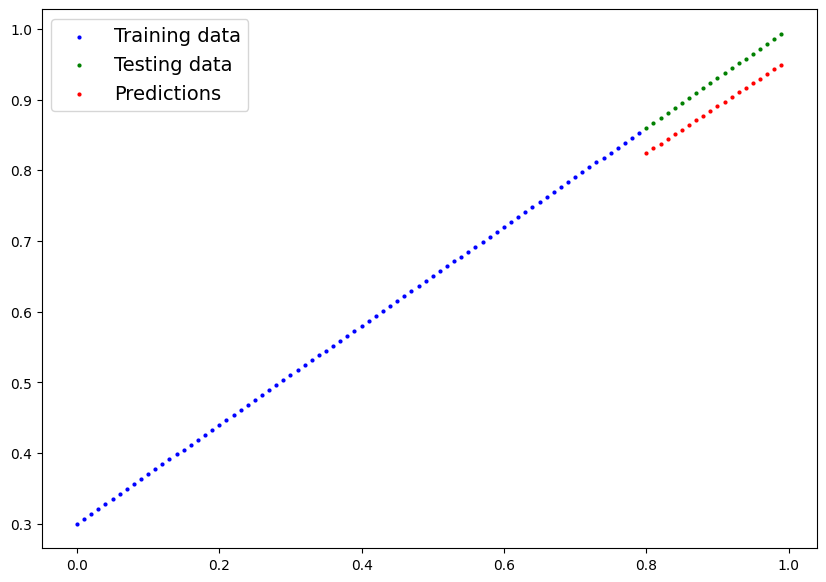

In [44]:
# now plot the data with predictions also
model_2.eval()
with torch.inference_mode():
  y_preds=model_2(x_test_reg)

#plot predictions
plot_predictions(x_train_reg.cpu(),y_train_reg.cpu(),x_test_reg.cpu(),y_test_reg,predictions=y_preds.cpu())



as we have noticed there is no fault in our model. Model is working well in case of linear  data . So it seems like we have to have to change the model in case if non-linear data

## 6. The missing piece : Non linearity



### 6.1 recreating non_linear data (circles dataset )

In [45]:
# make and plot data
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [46]:
X,y=make_circles(n_samples=1000, noise=0.02 , random_state=42)
len(X),len(y)


(1000, 1000)

In [47]:
circles=pd.DataFrame({"x1" : X[:,0] , "x2" : X[:,1] , "labels":y[:]})

circles.head()

,x1,x2,labels
0,0.760266,0.223878,1
1,-0.767222,0.145542,1
2,-0.808159,0.148944,1
3,-0.376028,0.703209,1
4,0.440510,-0.897617,0


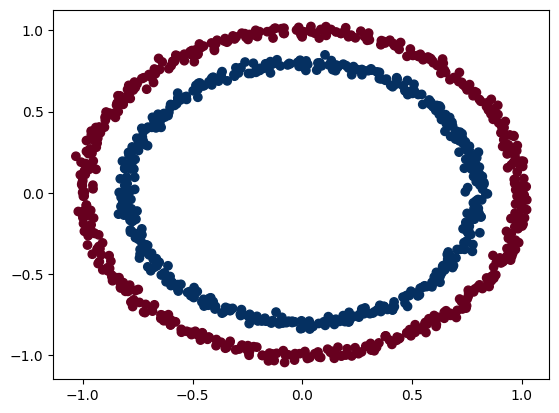

In [48]:
# plot to view the data
plt.scatter(X[:,0] , X[:,1] , c=y , cmap=plt.cm.RdBu);

In [49]:
#convert data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [50]:
# train , test split
X_train,X_test,y_train,y_test=train_test_split(X,y , test_size=0.2 , random_state=42)

#check lenght for both x and y train and test samples
len(X_train),len(X_test),len(y_train),len(y_test)



(800, 200, 800, 200)

In [51]:
# first 10 samples of each
X_train[:10],y_test[:10]

(tensor([[ 0.6483, -0.4748],
         [ 0.6464, -0.7356],
         [-1.0020, -0.1328],
         [-0.9692, -0.2252],
         [-0.1676,  0.7936],
         [-0.8871, -0.4613],
         [-0.3929,  0.6945],
         [ 0.5952,  0.5292],
         [-0.5972,  0.7824],
         [ 0.8809, -0.5058]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 6.2 Building a model with non-linearity
linear -> straight line


non-linear-> non-straight line (like curve )

In [52]:
# building a model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2 , out_features=10)
    self.layer2=nn.Linear(in_features=10, out_features=10)
    self.layer3=nn.Linear(in_features=10, out_features=1)
    self.relu=nn.ReLU() # it is non-linear activation function

  def forward(self,input_data):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(input_data)))))

model_3=CircleModelV2().to(device)
model_3 , device

(CircleModelV2(
   (layer1): Linear(in_features=2, out_features=10, bias=True)
   (layer2): Linear(in_features=10, out_features=10, bias=True)
   (layer3): Linear(in_features=10, out_features=1, bias=True)
   (relu): ReLU()
 ),
 'cpu')

In [53]:
# setting loss function and optimizer
loss_fn=nn.BCEWithLogitsLoss()

#optimizer
opt=torch.optim.SGD(params=model_3.parameters(), lr =0.1)

In [54]:
X_train.shape

torch.Size([800, 2])

In [55]:
len(X_test),len(y_test),len(X_train)

(200, 200, 800)

In [56]:
#training loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# get data to target device
# Convert to tensors before sending to device
X_train ,y_train= X_train.type(torch.float).to(device) , y_train.type(torch.float).to(device)
X_test , y_test=X_test.type(torch.float).to(device) , y_test.type(torch.float).to(device)


epoch=1000

#training loop
for epoch in range(epoch):
  #train the model
  model_3.train()

  #do a forward pass
  train_logits=model_3(X_train).squeeze() # as BCEWithLogitsLoss take raw ,unbound values as input which is called logits
  #sigmoid function convert logits into probabilities
  train_preds=torch.round(torch.sigmoid(train_logits))

  # calculate the loss
  loss=loss_fn(train_logits,y_train)

  #accuracy
  train_acc=accuracy_fn(y_train,train_preds)

  #optimizer
  opt.zero_grad()

  #backpropagation
  loss.backward()

  #optimizer step
  opt.step()

  #testing
  model_3.eval() #eliminate the things that are not required by model
  with torch.inference_mode():
    #forward pass
    test_logits=model_3(X_test).squeeze()
    test_preds=torch.round(torch.sigmoid(test_logits))


     #calculate the loss and accuracy
    test_loss=loss_fn(test_logits,y_test)
    test_accuracy=accuracy_fn(y_test,test_preds)
  if epoch % 10 ==0:
    print(f"epoch: {epoch} | loss: {loss:5f} | accuracy: {test_accuracy} test loss: {test_loss:5f}" )

epoch: 0 | loss: 0.692947 | accuracy: 50.0 test loss: 0.693127
epoch: 10 | loss: 0.692472 | accuracy: 50.0 test loss: 0.692532
epoch: 20 | loss: 0.692240 | accuracy: 57.49999999999999 test loss: 0.692248
epoch: 30 | loss: 0.692085 | accuracy: 68.0 test loss: 0.692056
epoch: 40 | loss: 0.691945 | accuracy: 71.5 test loss: 0.691880
epoch: 50 | loss: 0.691804 | accuracy: 59.0 test loss: 0.691696
epoch: 60 | loss: 0.691671 | accuracy: 55.00000000000001 test loss: 0.691527
epoch: 70 | loss: 0.691543 | accuracy: 52.5 test loss: 0.691370
epoch: 80 | loss: 0.691410 | accuracy: 53.5 test loss: 0.691217
epoch: 90 | loss: 0.691280 | accuracy: 53.5 test loss: 0.691065
epoch: 100 | loss: 0.691156 | accuracy: 53.0 test loss: 0.690914
epoch: 110 | loss: 0.691033 | accuracy: 54.0 test loss: 0.690765
epoch: 120 | loss: 0.690908 | accuracy: 54.0 test loss: 0.690615
epoch: 130 | loss: 0.690778 | accuracy: 54.50000000000001 test loss: 0.690458
epoch: 140 | loss: 0.690644 | accuracy: 54.50000000000001 test

### Make predictions and plot decision boundries

In [57]:
#make predictions
model_3.eval()
with torch.inference_mode():
  y3_preds=torch.round(torch.sigmoid(model_3(x_test))).squeeze()
y3_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

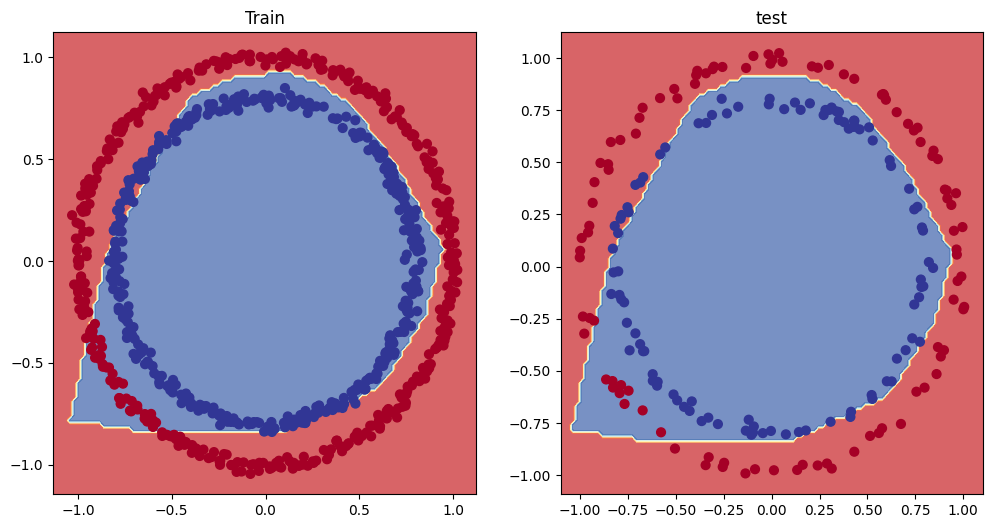

In [58]:
# ploting training data after model traning
from helper_functions import plot_predictions,plot_decision_boundary
plt.figure(figsize=(12,6))
#training
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,x_train,y_train)

#testing
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3,x_test,y_test)


#### Replicating non-linear activation function
Neural network ,rather than us telling the model what to learn, give it tools to diacover pattersn in data and it tries to figure out the patterns on its own

And these tools are **linear** and **Non-linear** functions

A neural network is a big stack of linear and non-linear functions


### ReLU

In [59]:
# create a tensor
A =torch.arange(-10,10,1 , dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

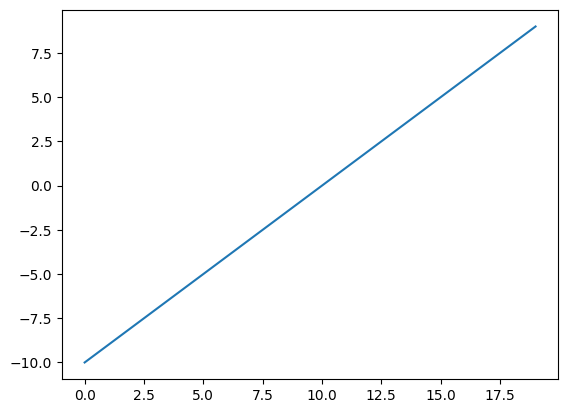

In [60]:
# visualize data of tensor
plt.plot(A);

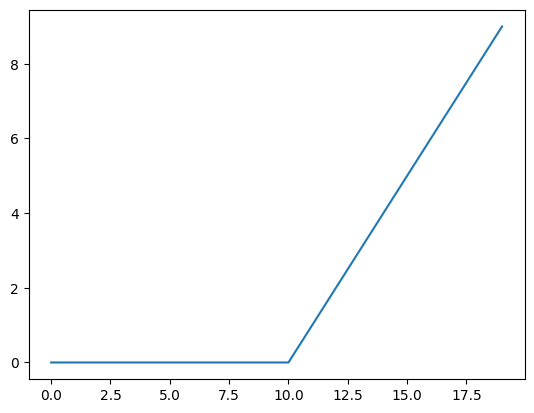

In [61]:
plt.plot(torch.relu(A)) # already defined can say that built in from pytorch

In [62]:
# defining relu by hand
def relu(x :torch.tensor)->torch.tensor: # -> it take tensor as input and return tensor as output
  return torch.max(torch.tensor(0),x)

print(f"A before passing through relu: {A}")
print(f"A after passing through relu: {relu(A)}")



A before passing through relu: tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])
A after passing through relu: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])


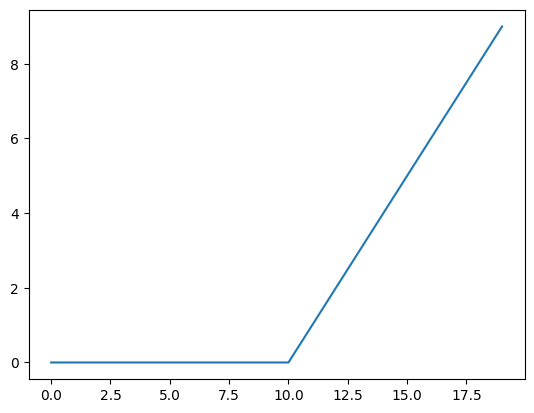

In [63]:
plt.plot(relu(A)) # the one we defined above

### Sigmoid

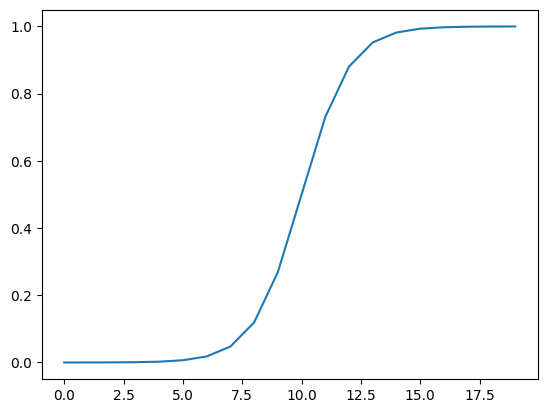

In [64]:
# Defining sigmoid function as we defined relu function above
def sigmoid(x):
 return(1/(1+torch.exp(-x)))
plt.plot(sigmoid(A))

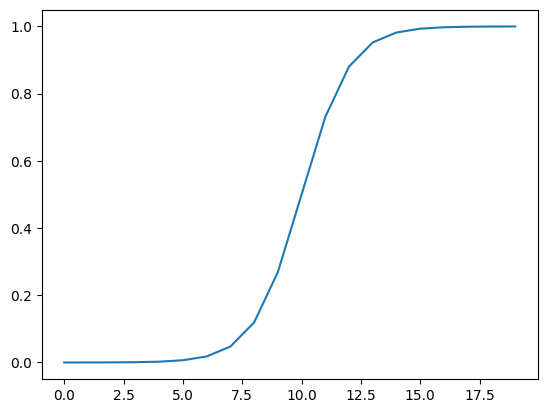

In [65]:
# using sigmoid built in from pytorch
plt.plot(torch.sigmoid(A))

### 8 putting it all together with a multi_class clasification


### 8.1 Creating toy multi-class dataset

### Data

In [66]:
 # import dependences
 import torch
 import numpy as np
 import matplotlib.pyplot as plt
 from sklearn.datasets import make_blobs
 from sklearn.model_selection import train_test_split


 #setting hyperparameters
NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42



In [67]:
# 1  create multiclass data
x_blob,y_blob=make_blobs(n_samples=1000 ,
                         n_features=NUM_FEATURES,
                         centers=NUM_CLASSES,
                         cluster_std=1.5,
                         random_state=RANDOM_SEED)

# 2. #turn data into tensor
x_blob=torch.from_numpy(x_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.float)

# view first 10 samples of each
x_blob[:10],y_blob[:10]

(tensor([[-8.4134,  6.9352],
         [-5.7665, -6.4312],
         [-6.0421, -6.7661],
         [ 3.9508,  0.6984],
         [ 4.2505, -0.2815],
         [-6.7941, -6.4772],
         [ 5.2102,  2.8890],
         [-5.5051, -6.3604],
         [-6.5438, -4.8339],
         [ 6.4496,  0.7478]]),
 tensor([3., 2., 2., 1., 1., 2., 1., 2., 2., 1.]))

In [68]:
# 3. train test split
x_blob_train,x_blob_test,y_blob_train,y_blob_test=train_test_split(x_blob,
                                                                   y_blob,
                                                                   test_size=0.2,
                                                                   random_state=RANDOM_SEED)






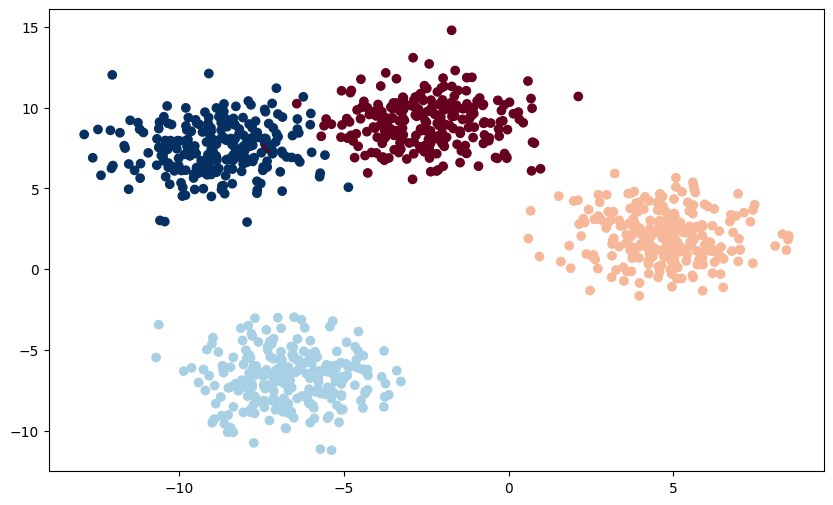

In [69]:
# visualization
plt.figure(figsize=(10,6))
#ploting "training "
plt.scatter(x_blob[:,0], x_blob[:,1] , c=y_blob ,
            cmap=plt.cm.RdBu)







## 8.2 Building multi class classification model

We can adjust these on the base of specific problem

 **Hyperparameters that will be used**
 1. Input layer shape
 2. Hidden layers
 3. Neurons per hidden layer
 4. Output layer shape
 5. Hidden layer activation
 6. output activation
 7. loss function
 8. Optimizer

In [70]:
# create device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Model building

In [71]:
#build multi class classification model
class BlobModel(nn.Module):
  def __init__(self,input_features , output_features , hidden_units):

   super().__init__()
   self.Linear_layer_stack=nn.Sequential(
      nn.Linear(in_features=input_features,out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units,out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=output_features)

   )
  def forward(self,x):
    return self.Linear_layer_stack(x)

# create instance of model and send it to target device
model_4=BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)


model_4

BlobModel(
  (Linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [72]:
x_blob_train.shape,y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [73]:
torch.unique(y_blob_train)

tensor([0., 1., 2., 3.])

### Loss function and optimizer

In [74]:
#loss function
# in case of multi class classification we are using CrossEntropyLoss
loss_fn=nn.CrossEntropyLoss()



In [75]:
# optimizer (update model parameters)
opt=torch.optim.SGD(params=model_4.parameters(),
                    lr=0.1)

### Training and Testing loop
logits ->pred probs ->pred labels

In [76]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# no of epochs
epochs=100

#put data on target device
x_blob_train,y_blob_train=x_blob_train.to(device),y_blob_train.to(device)
x_blob_test,y_blob_test=x_blob_test.to(device),y_blob_test.to(device)

#loop through data
for epoch in range(epochs):

 #tarining


  #train the model
  model_4.train()

  #forward pass
  train_logits=model_4(x_blob_train)
  train_preds=torch.softmax(train_logits , dim=1).argmax(dim=1)

  # claculate loss and accuracy
  train_loss=loss_fn(train_logits,y_blob_train.long()) # Convert target to Long
  train_acc=accuracy_fn(y_blob_train,train_preds)

  #optimizer
  opt.zero_grad() # Corrected typo

  ##backpropagation
  train_loss.backward()

  #optimizer step
  opt.step()


#testing
  model_4.eval()
  with torch.inference_mode():
    #forward pass
    test_logits=model_4(x_blob_test)
    test_preds=torch.softmax(test_logits,dim=1).argmax(dim=1) # Corrected typo


     #calculate the loss and accuracy
    test_loss=loss_fn(test_logits,y_blob_test.long()) # Convert target to Long
    test_acc=accuracy_fn(y_blob_test,test_preds)

   #print what happening
  if epoch %10==0 :
    print(f"epoch : {epoch} , train_loss : {train_loss} ,train_acc: {train_acc} , test_loss: {test_loss}, | test_acc: {test_acc}")

epoch : 0 , train_loss : 1.1588267087936401 ,train_acc: 40.375 , test_loss: 1.0755422115325928, | test_acc: 48.0
epoch : 10 , train_loss : 0.6447553038597107 ,train_acc: 96.75 , test_loss: 0.660687267780304, | test_acc: 97.5
epoch : 20 , train_loss : 0.4253515303134918 ,train_acc: 98.5 , test_loss: 0.43074119091033936, | test_acc: 100.0
epoch : 30 , train_loss : 0.2529422640800476 ,train_acc: 99.125 , test_loss: 0.24507610499858856, | test_acc: 99.5
epoch : 40 , train_loss : 0.11232147365808487 ,train_acc: 99.25 , test_loss: 0.10228512436151505, | test_acc: 99.5
epoch : 50 , train_loss : 0.06626509130001068 ,train_acc: 99.25 , test_loss: 0.058475371450185776, | test_acc: 99.5
epoch : 60 , train_loss : 0.05068016052246094 ,train_acc: 99.25 , test_loss: 0.042932283133268356, | test_acc: 99.5
epoch : 70 , train_loss : 0.04299675300717354 ,train_acc: 99.25 , test_loss: 0.034909654408693314, | test_acc: 99.5
epoch : 80 , train_loss : 0.038361385464668274 ,train_acc: 99.25 , test_loss: 0.029

In [84]:
# evaluation
model_4.eval()
with torch.inference_mode():
  y4_logits=model_4(x_blob_test)
y4_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [88]:
#converting logits(raw , unbound values) to probabilities
y4_pred_probs=(torch.softmax(y4_logits, dim=1))
y4_pred_probs[:10]


tensor([[1.3437e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5997e-05, 2.7210e-04]])

In [89]:
#probabilites to class labels
y4_preds=torch.argmax(y4_pred_probs,dim=1)
y4_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [87]:
y_blob_test[:10]

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.])

Text(0.5, 1.0, 'test')

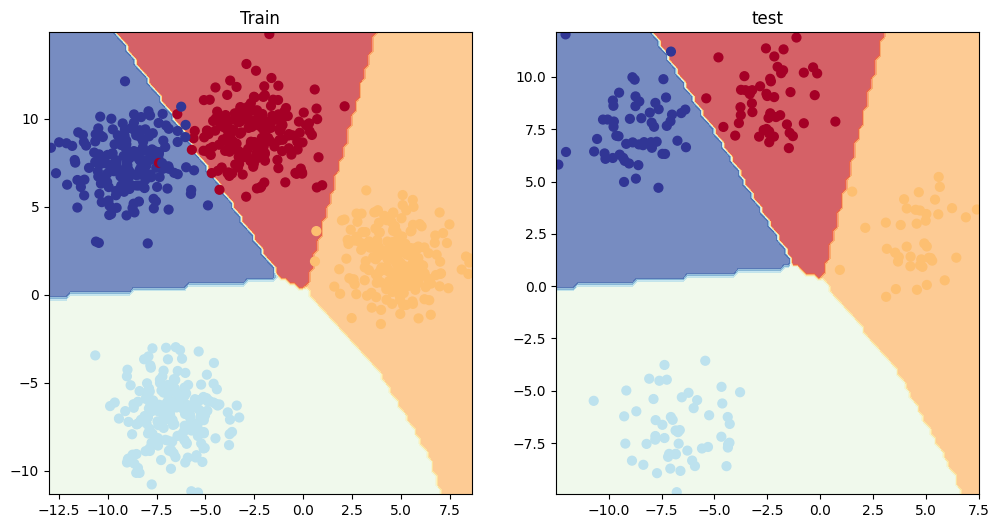

In [90]:
## visualization
#ploting training
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model_4,x_blob_train,y_blob_train)
plt.title("Train")

#plot testing
plt.subplot(1,2,2)
plot_decision_boundary(model_4,x_blob_test,y_blob_test)
plt.title("test")




### Few more classification metrics...(To evaluate our classsfication mode)

* Accuracy (out of 100 samples how many our mode get right)
* Recall
* Precision
* Confusion Matrix
* F1 score
* Classification report


### Accuracy
Definition: Out of all predictions, how many were correct.
Formula:

Accuracy
=
Correct Predictions/
Total Predictions

​

Example: If your model predicts 90 out of 100 correctly, accuracy is 90%.

### Recall (a.k.a. Sensitivity or True Positive Rate)
Definition: Out of all actual positive cases, how many did the model correctly detect.
Formula:

Recall
=
True Positives/
(True Positives + False Negatives)


Use Case: Important when missing a positive case is risky, like detecting a disease.



 Precision
Definition: Out of all the predicted positive cases, how many were actually positive.
Formula:

Precision
=
True Positives/(
True Positives + False Positives)


Use Case: Important when false alarms are costly, like in spam detection.



###Confusion Matrix
Definition: A 2x2 table (for binary classification) showing:

True Positives (TP)

False Positives (FP)

True Negatives (TN)

False Negatives (FN)


|                     | **Predicted Positive** | **Predicted Negative** |
| ------------------- | ---------------------- | ---------------------- |
| **Actual Positive** | TP                     | FN                     |
| **Actual Negative** | FP                     | TN                     |


 ###F1 Score
Definition: A single score that combines precision and recall using the harmonic mean.
Formula:



F1 Score=2×
Precision + Recall/
(Precision×Recall)
​

Use Case: Best when you want a balance between precision and recall.



### Classification Report
Definition: A detailed report showing:

Precision

Recall

F1-score

Support (number of true instances per class)

It's a summary table of all metrics for each class (in binary or multi-class classification).



In [91]:
! pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.9/981.9 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 802.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

In [96]:
from torchmetrics import Accuracy
# setuo metric
torchmetric_accuracy = Accuracy(task='multiclass' , num_classes=NUM_CLASSES).to(device)

#calculate accuracy
torchmetric_accuracy(y4_preds,y_blob_test)



tensor(0.9950)